<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><h1>


# Task and Dataset Info


**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

2023-05-26 19:06:58.307570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[]

# Recognizing and Understanding Data

**Download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**Use matplotlib to view an image from the data set**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
X_train[0].shape
# gray scaled (1 channel), small sized images

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

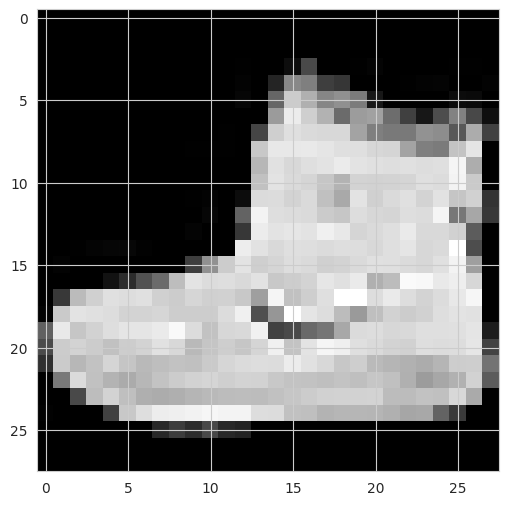

In [ ]:
plt.imshow(X_train[0],cmap='gray');

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train[0]

9

In [ ]:
classes[9]

'Ankle boot'

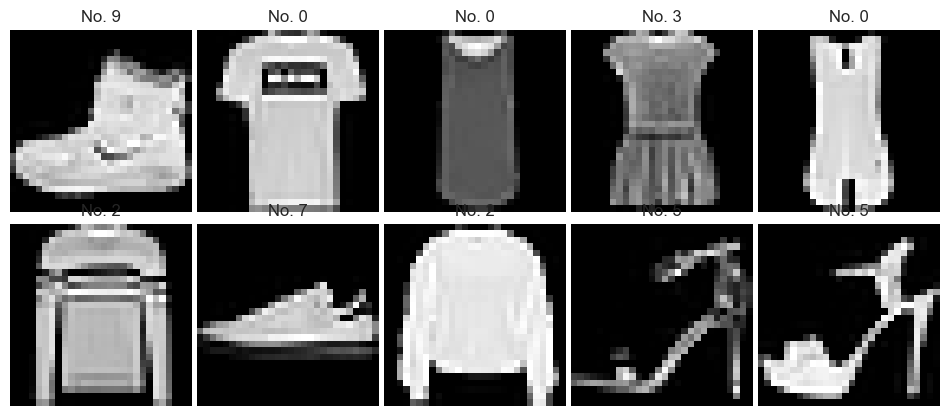

In [6]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [7]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.min()

0.0

In [ ]:
X_train.max()

1.0

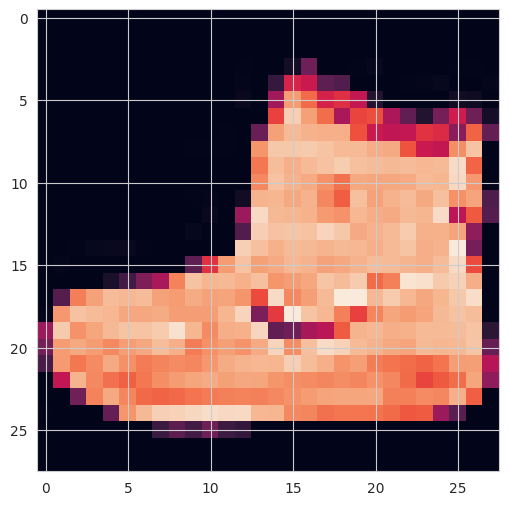

In [ ]:
plt.imshow(X_train[0]);

**Reshape the X arrays to include a 4 dimension of the single channel.**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [8]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [9]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [10]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [11]:
y_train[8]

5

In [12]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create The Model

**Use Keras to create a model**

**Compile the model**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [14]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

2023-05-26 19:14:56.686837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16128)             0         
                                                                 
 dense (Dense)               (None, 256)               4129024   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [ ]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**Train/Fit the model to the x_train set by using EarlyStop.**

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [18]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])
# 4 nolu epochun best weightsini kullanacak model

Epoch 1/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.4480 - accuracy: 0.8428 - val_loss: 0.3318 - val_accuracy: 0.8793
Epoch 2/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3150 - accuracy: 0.8869 - val_loss: 0.3041 - val_accuracy: 0.8933
Epoch 3/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.2840 - accuracy: 0.8964 - val_loss: 0.3034 - val_accuracy: 0.8939
Epoch 4/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.2694 - accuracy: 0.9042 - val_loss: 0.2791 - val_accuracy: 0.9011
Epoch 5/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.2620 - accuracy: 0.9077 - val_loss: 0.2827 - val_accuracy: 0.9042
Epoch 6/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2509 - accuracy: 0.9100 - val_loss: 0.3023 - val_accuracy: 0.9000
Epoch 7/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2499 - accuracy: 0.9136 - val_loss: 0.

**Plot values of metrics used in model.**

In [19]:
model.metrics_names

['loss', 'accuracy']

In [25]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.448,0.843,0.332,0.879
1,0.315,0.887,0.304,0.893
2,0.284,0.896,0.303,0.894
3,0.269,0.904,0.279,0.901
4,0.262,0.908,0.283,0.904


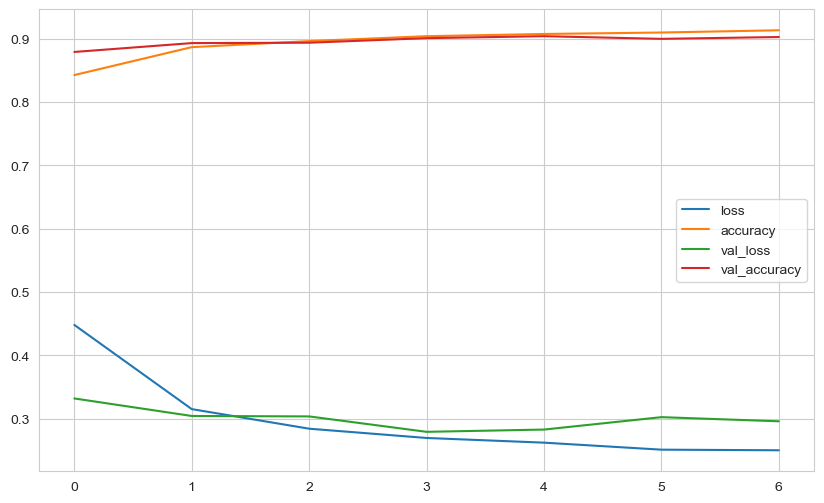

In [21]:
summary.plot();

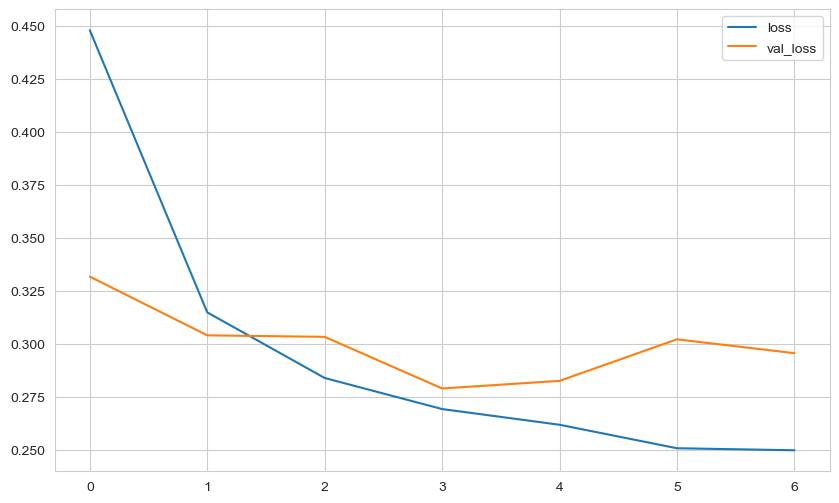

In [22]:
summary[["loss", "val_loss"]].plot();

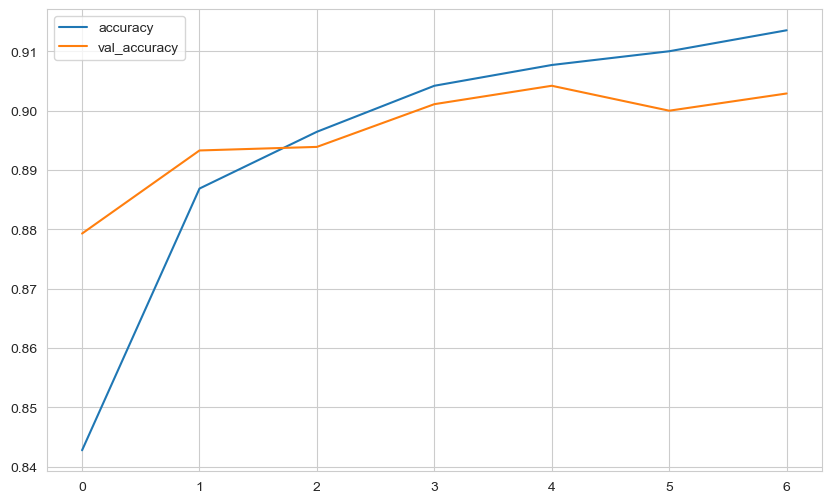

In [23]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2791 - accuracy: 0.9011


[0.27907606959342957, 0.9010999798774719]

In [28]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27907606959342957
Test accuracy: 0.9010999798774719


In [29]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 4s 11ms/step


array([[1.17926618e-07, 5.59973534e-09, 2.01104182e-08, ...,
        5.51224744e-04, 2.09495809e-07, 9.99388814e-01],
       [1.02380255e-07, 4.47563051e-16, 9.99998212e-01, ...,
        6.05173531e-14, 1.69481521e-13, 5.83868408e-15],
       [8.82554332e-08, 9.99999881e-01, 4.06564032e-10, ...,
        3.29926392e-10, 6.42650211e-10, 1.87766824e-09],
       ...,
       [8.49130330e-08, 3.02887160e-10, 3.18903446e-08, ...,
        7.67659181e-09, 9.99981761e-01, 1.32486772e-10],
       [2.07419970e-09, 1.00000000e+00, 5.82372215e-12, ...,
        4.62414525e-12, 5.76830380e-12, 4.80804396e-10],
       [1.19935127e-03, 5.41069930e-05, 1.74961507e-03, ...,
        5.21492809e-02, 2.61949166e-03, 7.56599987e-03]], dtype=float32)

In [ ]:
pred_prob.shape

(10000, 10)

In [ ]:
pred_prob[0]

array([7.9420692e-09, 1.1453322e-08, 1.0996484e-07, 2.8949161e-08,
       2.7803640e-07, 1.5175611e-05, 1.6366521e-07, 8.4777876e-06,
       7.2466790e-08, 9.9997568e-01], dtype=float32)

In [ ]:
np.argmax(pred_prob[0])

9

In [30]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_pred.shape

(10000,)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.83      0.84      1000
           3       0.93      0.89      0.91      1000
           4       0.78      0.90      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.70      0.72      1000
           7       0.92      0.99      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[884   0  16  14   1   1  81   0   3   0]
 [  1 978   0  16   1   0   1   1   2   0]
 [ 16   0 891  11  38   0  44   0   0   0]
 [ 19   7   8 935   6   0  24   0   1   0]
 [  1   0 129  56 725   0  88   0   1   0]
 [  0   0   0   0   0 981   0  12   0   7]
 [135   1 106  31  42   0 679   0   6   0]
 [  0   0   0   0   0   6   0 963   0  31]
 [  3   2   0   3   1   4   5   3 979   0]
 [  0   0   1   0   0   5   0  29   0 965]]


In [32]:
(y_test != y_pred).sum()

989

## Prediction

In [33]:
samples=[X_test[0], X_test[1], X_test[2]]

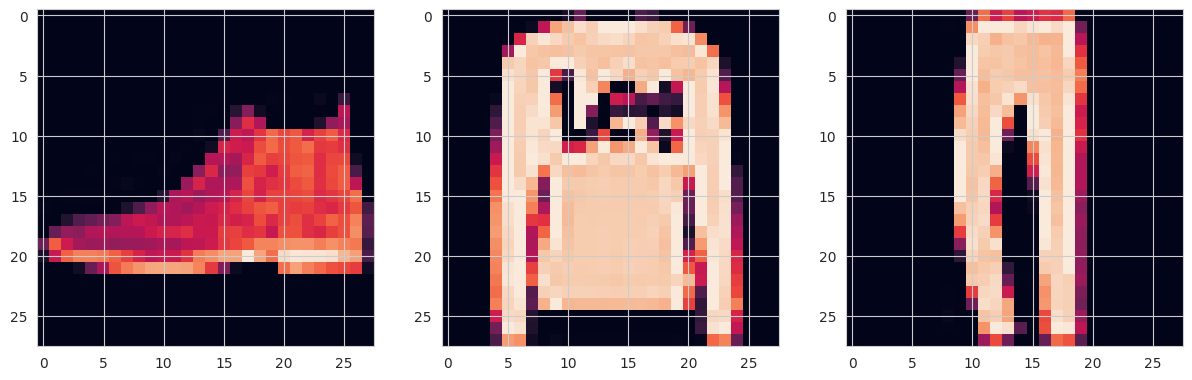

In [ ]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [34]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
samples.shape
# 3 images, 28x28 size, 1 channel grayscaled

(3, 28, 28, 1)

In [35]:
pred_prob = model.predict(samples)
pred_prob

1/1 [==============================] - 0s 28ms/step


array([[1.17926504e-07, 5.59973534e-09, 2.01104946e-08, 3.66288440e-08,
        1.92857037e-08, 5.94930243e-05, 4.45864572e-08, 5.51224744e-04,
        2.09496207e-07, 9.99388814e-01],
       [1.02380447e-07, 4.47564798e-16, 9.99998212e-01, 1.34220879e-09,
        1.70613748e-06, 1.54617691e-15, 2.61934652e-08, 6.05173531e-14,
        1.69481196e-13, 5.83868408e-15],
       [8.82554332e-08, 9.99999881e-01, 4.06565559e-10, 2.39381919e-08,
        1.52781894e-08, 8.47494408e-10, 8.60578364e-09, 3.29927030e-10,
        6.42652598e-10, 1.87766824e-09]], dtype=float32)

In [36]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1])

In [37]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [ ]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
for i in y_test[:3]:
    print(classes[i])

Ankle boot
Pullover
Trouser


## Reference Link


https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e


https://medium.com/swlh/emotion-detection-using-opencv-and-keras-771260bbd7f7

https://medium.com/@ramitag18/object-localization-and-object-detection-b936c7dff8ce